In [43]:
import os

# Get the current directory
current_dir = os.getcwd()

# Iterate over the files in the directory
for file_name in os.listdir(current_dir):
    # Check if the path represents a file
    if os.path.isfile(os.path.join(current_dir, file_name)):
        # Print the file name
        print(file_name)


Adaboost_CICIDS_class_accuracy.png
Adaboost_CICIDS_class_f1_score.png
Adaboost_CICIDS_metrics.csv
Adaboost_CICIDS_precision_recall_curve.png
Adaboost_CICIDS_roc_curve.png
Adaboost_EdgeIIoT_class_accuracy.png
Adaboost_EdgeIIoT_class_f1_score.png
Adaboost_EdgeIIoT_metrics.csv
Adaboost_EdgeIIoT_precision_recall_curve.png
Adaboost_EdgeIIoT_roc_curve.png
Adaboost_NSL_KDD_class_accuracy.png
Adaboost_NSL_KDD_class_f1_score.png
Adaboost_NSL_KDD_metrics.csv
Adaboost_NSL_KDD_precision_recall_curve.png
Adaboost_NSL_KDD_roc_curve.png
Adaboost_UNSW_NB15_class_accuracy.png
Adaboost_UNSW_NB15_class_f1_score.png
Adaboost_UNSW_NB15_metrics.csv
Adaboost_UNSW_NB15_precision_recall_curve.png
Adaboost_UNSW_NB15_roc_curve.png
CICIDS_metrics.csv
CICIDS_metrics_1.png
CNN_CICIDS_class_accuracy.png
CNN_CICIDS_class_f1_score.png
CNN_CICIDS_metrics.csv
CNN_CICIDS_precision_recall_curve.png
CNN_CICIDS_roc_curve.png
CNN_EdgeIIoT_class_accuracy.png
CNN_EdgeIIoT_class_f1_score.png
CNN_EdgeIIoT_metrics.csv
CNN_EdgeIIo

                                 Accuracy  Precision (macro)  Recall (macro)  \
Model                 Dataset                                                  
Adaboost              CICIDS     0.860032           0.162916        0.258881   
                      EdgeIIoT   0.404511           0.941749        0.266651   
                      NSL_KDD    0.857191           0.975063        0.111111   
                      UNSW_NB15  0.789919           0.382420        0.411691   
CNN                   CICIDS     0.981759           0.886265        0.744799   
                      EdgeIIoT   0.999934           0.999930        0.999934   
                      NSL_KDD    0.998115           0.886375        0.854675   
                      UNSW_NB15  0.887449           0.599081        0.482082   
DecisionTree          CICIDS     0.996620           0.882998        0.886650   
                      EdgeIIoT   0.999934           0.999587        0.999051   
                      NSL_KDD    0.99983

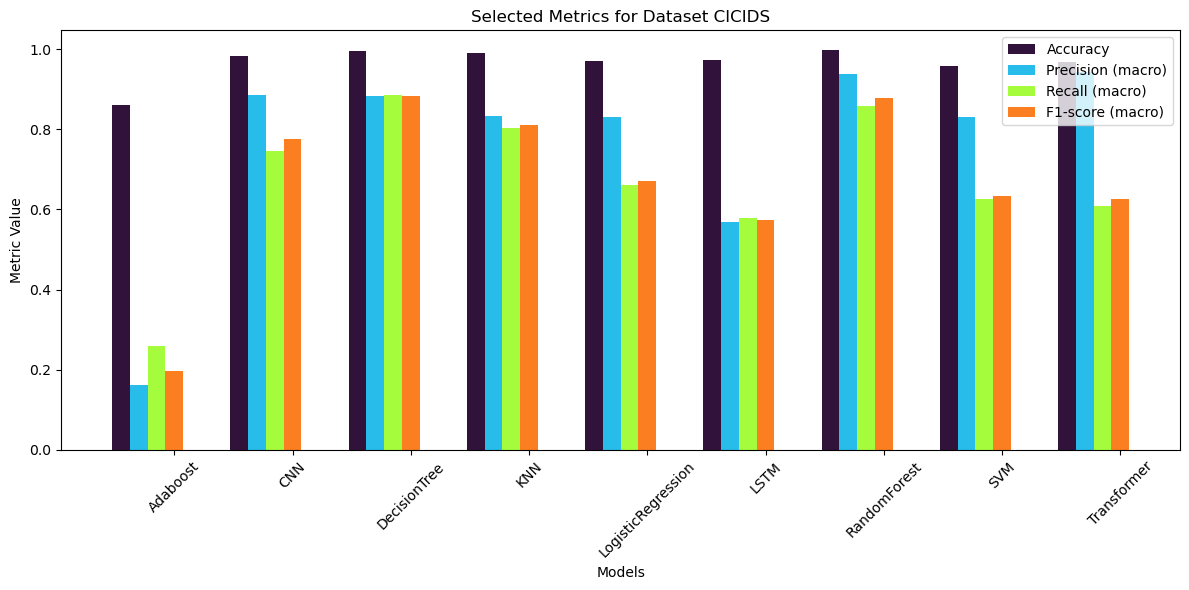

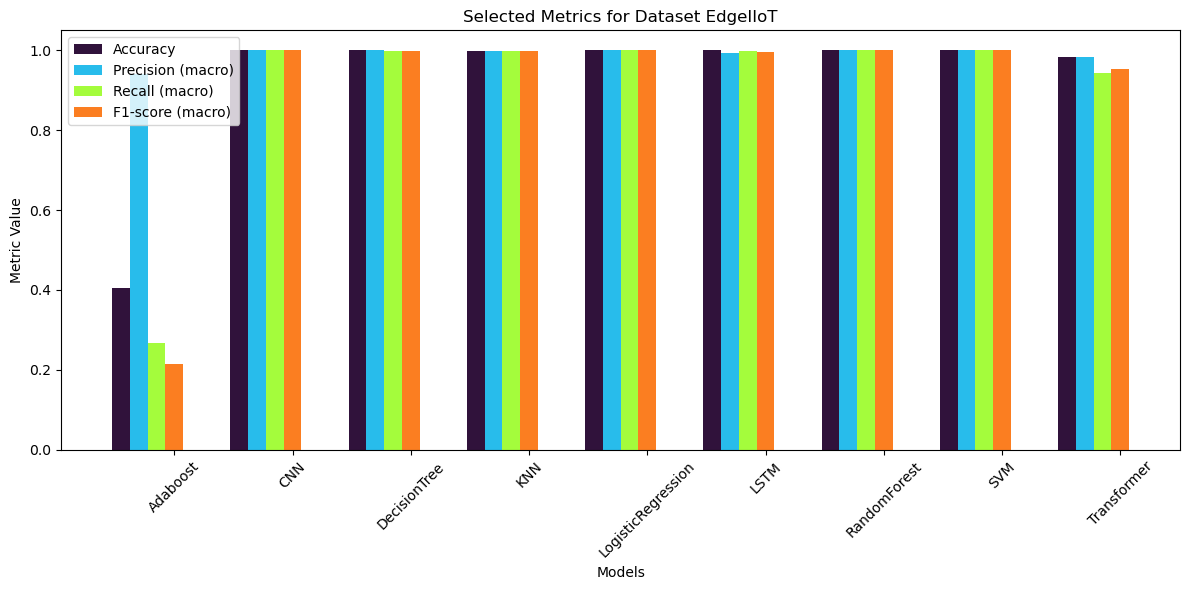

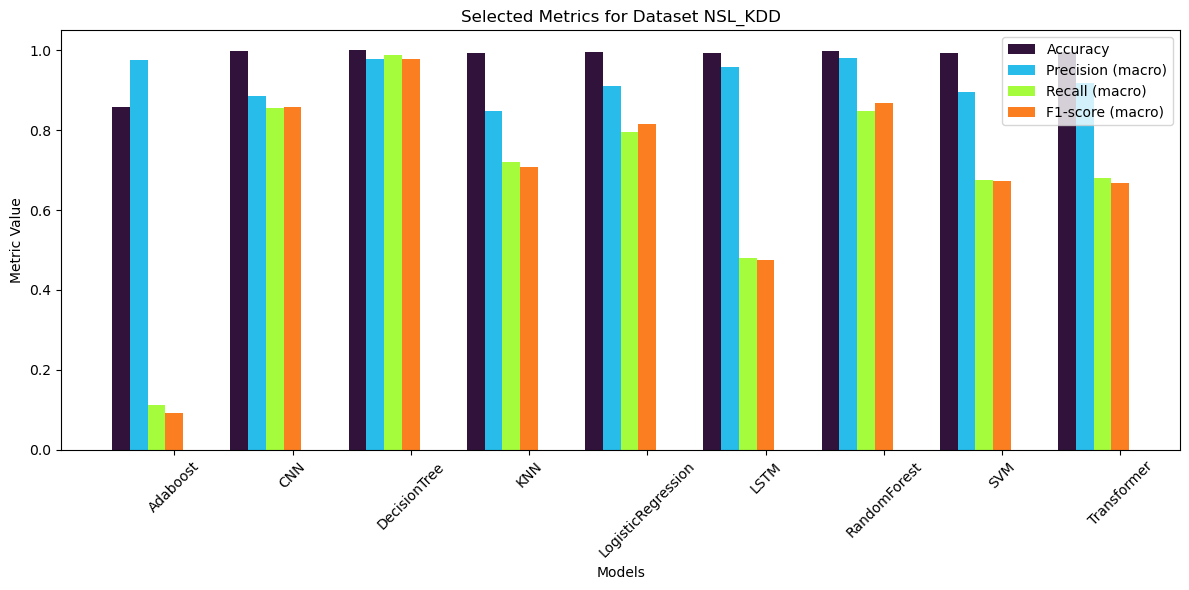

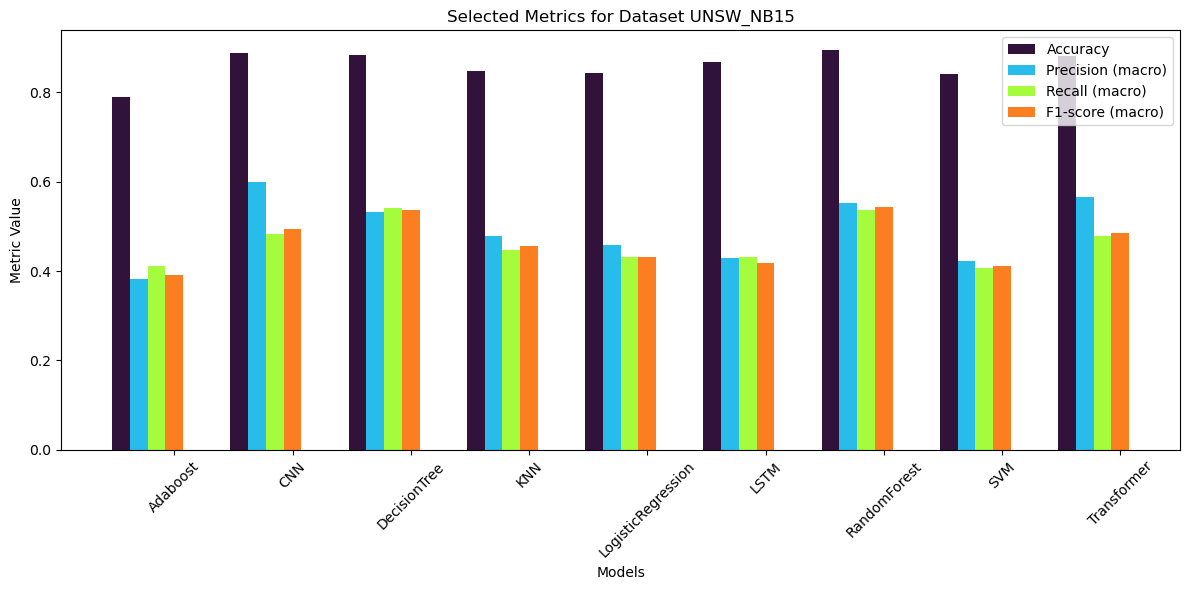

In [32]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# List of machine learning models to compare
ml_models = ['Adaboost', 'CNN', 'DecisionTree', 'KNN', 'LogisticRegression', 'LSTM', 'RandomForest', 'SVM', 'Transformer_ids_model']

# List of datasets used
datasets = ['CICIDS', 'EdgeIIoT', 'NSL_KDD', 'UNSW_NB15']

# Initialize a dictionary to hold the selected metrics for each model and dataset
metrics_data = {}

# Define the selected metrics
selected_metrics = ['Accuracy', 'Precision (macro)', 'Recall (macro)', 'F1-score (macro)']

# Loop over each model and dataset
for model in ml_models:
    for dataset in datasets:
        # Create the filename
        filename = f"{model}_{dataset}_metrics.csv"
        
        # Try to read the CSV file
        try:
            df = pd.read_csv(filename, index_col=0)
            # Store the selected metrics in the dictionary
            metrics_data[(model, dataset)] = df.loc[selected_metrics, 'Value']
        except FileNotFoundError:
            print(f"File {filename} not found.")

# Convert the dictionary into a DataFrame
metrics_df = pd.DataFrame.from_dict(metrics_data, orient='index')
metrics_df.index = pd.MultiIndex.from_tuples(metrics_df.index, names=['Model', 'Dataset'])
metrics_df.columns = selected_metrics

# Print out the metrics for each model and dataset
print(metrics_df)

# Replace 'transformer_ids_model' with 'Transformer'
metrics_df = metrics_df.rename(index=lambda x: x.replace('transformer_ids_model', 'Transformer'))

# Identify the best model for each dataset based on the selected metric
for dataset in datasets:
    dataset_df = metrics_df.xs(dataset, level='Dataset')
    best_model = dataset_df[selected_metrics[0]].idxmax()
    print(f"The best model for dataset {dataset} is {best_model} with a {selected_metrics[0]} of {dataset_df[selected_metrics[0]].max()}.")

# Plot the selected metrics of each model for each dataset
color_map = plt.get_cmap('turbo')
bar_width = 0.15
num_models = len(ml_models)
ml_models = ['Adaboost', 'CNN', 'DecisionTree', 'KNN', 'LogisticRegression', 'LSTM', 'RandomForest', 'SVM', 'Transformer']
for i, dataset in enumerate(datasets):
    plt.figure(figsize=(12, 6))
    dataset_df = metrics_df.xs(dataset, level='Dataset')

    for j, metric in enumerate(selected_metrics):
        model_indices = np.arange(num_models) + j * bar_width
        bar_color = color_map(j / len(selected_metrics))

        plt.bar(model_indices, dataset_df[metric], width=bar_width, label=metric, color=bar_color)

    plt.xlabel('Models')
    plt.ylabel('Metric Value')
    plt.title(f'Selected Metrics for Dataset {dataset}')
    plt.xticks(model_indices, ml_models, rotation=45)
    plt.legend()
    plt.tight_layout()
    
    # Save the plot as a high-quality PNG file
    plt.savefig(f'{dataset}_metrics_1.png', dpi=300)
    
    plt.show()
# 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b',
# 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r'

In [46]:
import pandas as pd

# List of machine learning models to compare
ml_models = ['Adaboost', 'CNN', 'DecisionTree', 'KNN', 'LogisticRegression', 'LSTM', 'RandomForest', 'SVM', 'transformer_ids_model']

# List of datasets used
datasets = ['CICIDS', 'EdgeIIoT', 'NSL_KDD', 'UNSW_NB15']

# Initialize a dictionary to hold DataFrame lists and column information
all_dataframes = {dataset: [] for dataset in datasets}
column_info = {dataset: [] for dataset in datasets}

# Loop over each model and dataset
for model in ml_models:
    # Replace "transformer_ids_model" with "Transformer"
    readable_model = model.replace("transformer_ids_model", "Transformer")
    
    for dataset in datasets:
        # Create the filename
        filename = f"{model}_{dataset}_metrics.csv"
        
        # Try to read the CSV file
        try:
            df = pd.read_csv(filename, index_col=0).transpose()
            df['Model'] = readable_model
            df['Dataset'] = dataset
            all_dataframes[dataset].append(df)
            # Store the number of columns and column names in the dictionary
            column_info[dataset].append((len(df.columns), df.columns.tolist()))
        except FileNotFoundError:
            print(f"File {filename} not found.")

# Create and save datasets to CSV files, and check if all have the same number of columns and column names
for dataset in datasets:
    # Concatenate dataframes for a specific dataset
    df = pd.concat(all_dataframes[dataset])
    
    # Save to a single CSV file
    df.to_csv(f"{dataset}_metrics.csv")

    # Print the format of the combined CSV file
    print(df.head())

    # Check if all files have the same number of columns and column names
    num_columns = [value[0] for value in column_info[dataset]]
    column_names = [value[1] for value in column_info[dataset]]

    if len(set(num_columns)) == 1 and len(set(tuple(i) for i in column_names)) == 1:
        print(f"All CSV files for {dataset} have the same number of columns and column names.")
    else:
        print(f"Not all CSV files for {dataset} have the same number of columns and column names.")


Metric  Accuracy  Precision (macro)  Recall (macro)  F1-score (macro)  \
Value   0.860032           0.162916        0.258881          0.196455   
Value   0.981759           0.886265        0.744799          0.775787   
Value   0.996620           0.882998        0.886650          0.884200   
Value   0.989398           0.833361        0.802642          0.811396   
Value   0.969551           0.830712        0.660335          0.670996   

Metric  AUC-ROC (macro)  Precision (BENIGN)  Recall (BENIGN)  \
Value          0.644672            0.901061         0.992800   
Value          0.994585            0.985195         0.993736   
Value          0.943116            0.998784         0.998746   
Value          0.963373            0.994782         0.993978   
Value          0.987506            0.981584         0.981247   

Metric  F1-score (BENIGN)  Precision (Bot)  Recall (Bot)  ...  \
Value            0.944709         0.000000      0.000000  ...   
Value            0.989447         0.838942    

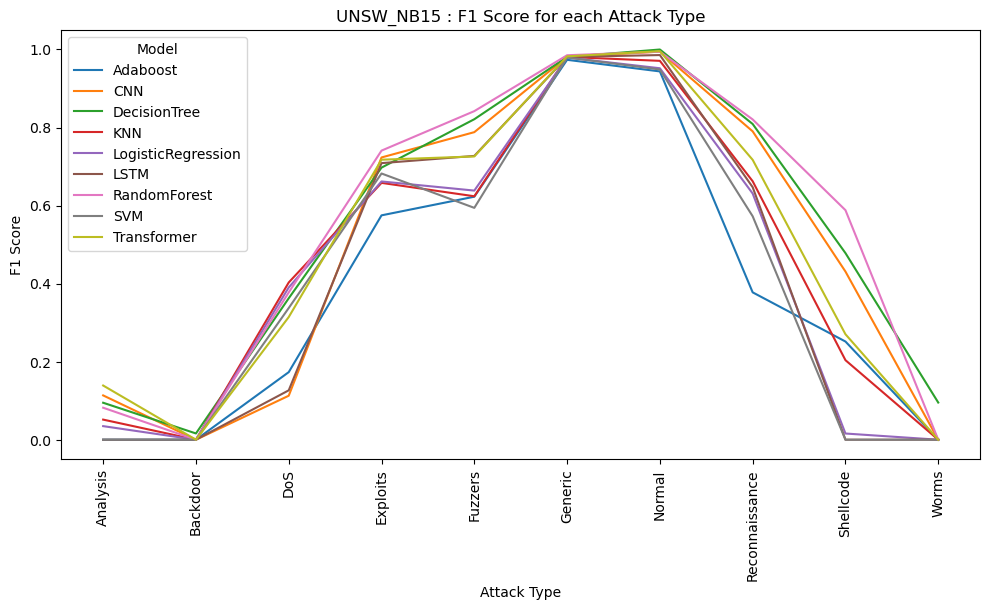

In [16]:
## line plotting
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##  EdgeIIoT   NSL_KDD    UNSW_NB15


dataset = 'UNSW_NB15'
# Specify the file path of the metrics.csv file
csv_file = f'{dataset}_metrics.csv'

# Load the CSV file into a pandas DataFrame
data = pd.read_csv(csv_file)

# Extracting attack types correctly
attack_types = [col.replace('F1-score (', '').replace(')', '') for col in data.columns if 'F1-score' in col and col != 'F1-score (macro)']

# Extracting F1-scores for each attack type
f1_scores = data[[f'F1-score ({attack})' for attack in attack_types]].values

# Creating a new dataframe for the plot
df_plot = pd.DataFrame(f1_scores, columns=attack_types)
df_plot['Model'] = data['Model']

# Melting the dataframe to have each data point as a row (required format for seaborn)
df_plot = df_plot.melt(id_vars='Model', var_name='Attack Type', value_name='F1 Score')

# Creating the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_plot, x='Attack Type', y='F1 Score', hue='Model')
plt.xticks(rotation=90)
plt.tight_layout()
plt.title(f'{dataset} : F1 Score for each Attack Type')
# Save the plot as a high-quality PNG file
plt.savefig(f'{dataset}_F1_scores.png', dpi=300, bbox_inches='tight')
plt.show()



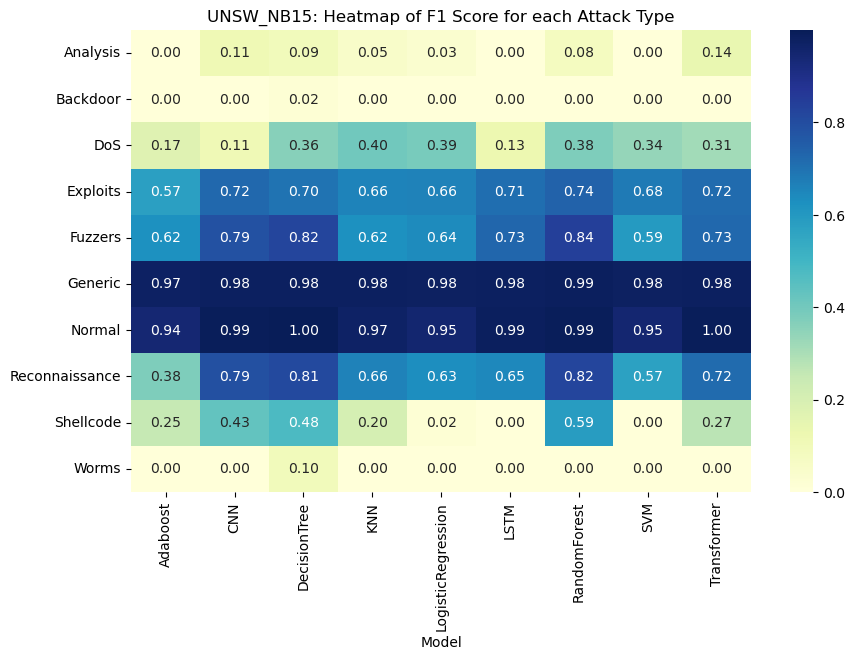

In [17]:
# Correcting the extraction of F1-scores for the heatmap
f1_scores_heatmap = data[[f'F1-score ({attack})' for attack in attack_types] + ['Model']]
f1_scores_heatmap.columns = attack_types + ['Model']
f1_scores_heatmap = f1_scores_heatmap.set_index('Model').transpose()

# Creating the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(f1_scores_heatmap, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title(f'{dataset}: Heatmap of F1 Score for each Attack Type')
# Save the plot as a high-quality PNG file
plt.savefig(f'{dataset}_F1_score_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()
